In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
#  def Network():
   
#  """
#     3D convnet
#     """
#     def __init__(self):
#         Network.__init__(self)
#         self.patch_width = None
#         self.patch_width_3d = None
#         self.n_centroids = None

#     def init(self, patch_width, patch_width_comp, patch_width_3d, n_centroids, n_out):
#         Network.init_common(self, 3 * patch_width**2 + 3 * patch_width_comp**2 + patch_width_3d**3 + n_centroids, n_out)

#         self.patch_width = patch_width
#         self.patch_width_3d = patch_width_3d
#         self.n_centroids = n_centroids

#         self.ls_layers = []
#         neuron_relu = neuron_type.NeuronRELU()

#         # Layer 0

#         splits = [0] + [patch_width**2]*3 + [patch_width_comp**2]*3 + [self.patch_width_3d**3] + [n_centroids]
#         self.ls_layers.append(LayerDivideFeatures(np.cumsum(splits)))

#         # Layer 1
#         kernel_height0 = 5
#         kernel_width0 = 5
#         pool_size_height0 = 2
#         pool_size_width0 = 2
#         n_kern0 = 20
#         block0 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(1, patch_width, patch_width),
#                                       flt_shape=(n_kern0, 1, kernel_height0, kernel_width0),
#                                       poolsize=(pool_size_height0, pool_size_width0))

#         block1 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(1, patch_width_comp, patch_width_comp),
#                                       flt_shape=(n_kern0, 1, kernel_height0, kernel_width0),
#                                       poolsize=(pool_size_height0, pool_size_width0))

#         n_out_1_3 = 1000
#         block_3d = LayerBlockFullyConnected(neuron_relu, patch_width_3d**3, n_out_1_3)

#         block_centroids = LayerBlockIdentity()

#         self.ls_layers.append(LayerOfBlocks([block0, block0, block0, block1, block1, block1, block_3d, block_centroids]))

#         # Layer 2
#         filter_map_height1 = (patch_width - kernel_height0 + 1) / pool_size_height0
#         filter_map_width1 = (patch_width - kernel_width0 + 1) / pool_size_width0
#         kernel_height1 = 5
#         kernel_width1 = 5
#         pool_size_height1 = 2
#         pool_size_width1 = 2
#         n_kern1 = 50
#         block0 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(n_kern0, filter_map_height1, filter_map_width1),
#                                       flt_shape=(n_kern1, n_kern0, kernel_height1, kernel_width1),
#                                       poolsize=(pool_size_height1, pool_size_width1))
#         block1 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(n_kern0, filter_map_height1, filter_map_width1),
#                                       flt_shape=(n_kern1, n_kern0, kernel_height1, kernel_width1),
#                                       poolsize=(pool_size_height1, pool_size_width1))
#         block2 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(n_kern0, filter_map_height1, filter_map_width1),
#                                       flt_shape=(n_kern1, n_kern0, kernel_height1, kernel_width1),
#                                       poolsize=(pool_size_height1, pool_size_width1))

#         filter_map_height1_comp = (patch_width_comp - kernel_height0 + 1) / pool_size_height0
#         filter_map_width1_comp = (patch_width_comp - kernel_width0 + 1) / pool_size_width0
#         block3 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(n_kern0, filter_map_height1_comp, filter_map_width1_comp),
#                                       flt_shape=(n_kern1, n_kern0, kernel_height1, kernel_width1),
#                                       poolsize=(pool_size_height1, pool_size_width1))
#         block4 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(n_kern0, filter_map_height1_comp, filter_map_width1_comp),
#                                       flt_shape=(n_kern1, n_kern0, kernel_height1, kernel_width1),
#                                       poolsize=(pool_size_height1, pool_size_width1))
#         block5 = LayerBlockConvPool2D(neuron_relu,
#                                       in_shape=(n_kern0, filter_map_height1_comp, filter_map_width1_comp),
#                                       flt_shape=(n_kern1, n_kern0, kernel_height1, kernel_width1),
#                                       poolsize=(pool_size_height1, pool_size_width1))

#         n_out_2_3 = 1000
#         block_3d = LayerBlockFullyConnected(neuron_relu, n_out_1_3, n_out_2_3)

#         block_centroids = LayerBlockIdentity()

#         self.ls_layers.append(LayerOfBlocks([block0, block1, block2, block3, block4, block5, block_3d, block_centroids]))

#         # Layer 3
#         self.ls_layers.append(LayerMergeFeatures())

#         # Layer 4
#         filter_map_height2 = (filter_map_height1 - kernel_height1 + 1) / pool_size_height1
#         filter_map_with2 = (filter_map_width1 - kernel_width1 + 1) / pool_size_width1
#         filter_map_height2_comp = (filter_map_height1_comp - kernel_height1 + 1) / pool_size_height1
#         filter_map_with2_comp = (filter_map_width1_comp - kernel_width1 + 1) / pool_size_width1
#         n_in2 = 3 * n_kern1 * filter_map_height2 * filter_map_with2 + \
#                 3 * n_kern1 * filter_map_height2_comp * filter_map_with2_comp + n_out_2_3 + n_centroids
#         n_out2 = 3000
#         block0 = LayerBlockFullyConnected(neuron_relu, n_in=n_in2, n_out=n_out2)
#         self.ls_layers.append(LayerOfBlocks([block0]))

#         # Layer 5
#         n_out3 = 3000
#         block0 = LayerBlockFullyConnected(neuron_relu, n_in=n_out2, n_out=n_out3)
#         self.ls_layers.append(LayerOfBlocks([block0]))

#         # Layer 6
#         block0 = LayerBlockFullyConnected(neuron_type.NeuronSoftmax(), n_in=n_out3, n_out=self.n_out)
#         self.ls_layers.append(LayerOfBlocks([block0]))

#         self.ls_params = []
#         for l in self.ls_layers:
#             self.ls_params += l.params

#     def save_parameters_virtual(self, h5file):
#         h5file.attrs['patch_width'] = self.patch_width
#         h5file.attrs['patch_width_3d'] = self.patch_width_3d
#         h5file.attrs['n_centroids'] = self.n_centroids

#     def load_parameters_virtual(self, h5file):
#         self.patch_width = int(h5file.attrs["patch_width"])
#         self.patch_width_3d = int(h5file.attrs["patch_width_3d"])
#         self.n_centroids = int(h5file.attrs["n_centroids"])
#         self.init(self.patch_width, 29, self.patch_width_3d, self.n_centroids, self.n_out)


In [4]:
from tqdm import tqdm
import cv2
import glob
from skimage.transform import resize
import skimage.io as io
from skimage.io import imread, imshow
from google.colab.patches import cv2_imshow
import numpy as np
img_dims = 256 
my_epochs = 20
batch_size = 32
X_train = []
Y_train = []
i_path = 'sarcopenia-ai-master/Deblurred_Outputs/*.jpg'
m_path = 'sarcopenia-ai-master/Threshold_Outputs_Modified/*.jpg'
# X_train = np.zeros((len(i_path), img_dims, img_dims, 3), dtype=np.uint8)
# Y_train = np.zeros((len(m_path), img_dims, img_dims, 1), dtype=np.uint8)

# for n, file in tqdm(enumerate(i_path), total=len(i_path)):
#     t_img = imread(file)
#     t_img = resize(t_img, (img_dims, img_dims, 3), mode='constant', preserve_range=True)
#     X_train[n] = t_img
#     if Path(m_path + file).exists():
#         m_mask = cvimread(m_path + file)
#     else:
#         m_mask = imread(m_path + file )
#     m_mask = resize(m_mask, (img_dims, img_dims, 1), mode='constant', preserve_range=True)
#     Y_train[n] = m_mask
for filename in glob.glob(i_path):
  img = cv2.imread(filename)
  train_imgs = resize(img, (30,img_dims, img_dims, 3), mode='constant', preserve_range=True)
  X_train.append(list(train_imgs))
for filename in glob.glob(m_path):
  img = cv2.imread(filename)
  mask_imgs = resize(img, (30,img_dims, img_dims, 1), mode='constant', preserve_range=True)
  Y_train.append(list(mask_imgs))
# train_imgs = cv2.imread('sarcopenia-ai-master/Deblurred_Outputs/*.jpg')
# mask_imgs = cv2.imread('sarcopenia-ai-master/Threshold_Outputs_Modified/*.jpg')
# test_imgs = '/Deblurred_Outputs/'

# X_train = np.zeros((len(train_imgs), img_dims, img_dims, 3), dtype=np.uint8)
# Y_train = np.zeros((len(mask_imgs), img_dims, img_dims, 1), dtype=np.uint8)

# for n, file in tqdm(enumerate(train_imgs), total=len(train_imgs)):
#     t_img = imread(inPath + "/CXR_png/" + file)
#     t_img = resize(t_img, (img_dims, img_dims, 3), mode='constant', preserve_range=True)
#     X_train[n] = t_img
#     if Path(inPath + "/masks/" + file).exists():
#         m_mask = imread(inPath + "/masks/" + file)
#     else:
#         m_mask = imread(inPath + "/masks/" + file[:-4] + "_mask.png")
#     m_mask = resize(m_mask, (img_dims, img_dims, 1), mode='constant', preserve_range=True)
#     Y_train[n] = m_mask
# mask_imgs
# Y_train
# images = np.concatenate((X_train),axis=0)
# mask  = np.concatenate((Y_train),axis=0)

In [ ]:
# print(mask_imgs.shape)

In [ ]:
# y_train = np.asarray(mask_imgs).astype('float32').reshape((256,3))
# x_train = np.asarray(train_imgs).astype('float32').reshape((256,1))

In [ ]:
# from skimage.transform import resize
# t_img = resize(train_imgs, (img_dims, img_dims, 3))

# m_mask = resize(mask_imgs, (img_dims, img_dims, 1))
# print(t_img.shape)

In [ ]:
# X_train = np.zeros(( img_dims, img_dims, 3), dtype=np.uint8)
# Y_train = np.zeros(( img_dims, img_dims, 1), dtype=np.uint8)
# print(Y_train.shape)

In [ ]:
# import array
# def as_images_tensor_4D (imagelist, height, width, channels) :
#   #feature <- keras::array_reshape(imagelist, dim = c(NROW(imagelist), height, width, channels))
#   dim = imagelist.shape[0]
#   if (channels == 'gray'):
#     channels = channels
#   tensor = array('None', height, width, 3)
 
#   return(tensor)


In [ ]:

# X_train = as_images_tensor_4D(X_train, 256, 256, 'gray')

# Y_train = as_images_tensor_4D(Y_train)

In [ ]:
#  print(Y_train)

In [5]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
# input_size = (256,3)
# inputs = Input(input_size)
# print(inputs)
inputs = tf.keras.layers.Input((img_dims, img_dims,3))

In [ ]:

# c1 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
# c1 = tf.keras.layers.Dropout(rate=0.2)(c1)
# c1 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c1)
# # c1 = tf.keras.layers.MaxPooling1D(pool_size=2)(c1)


# # #second convolutional block
# c2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c1)
# c2 = tf.keras.layers.Dropout(rate=0.2)(c2)
# c2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c2)
# # c2 = tf.keras.layers.MaxPooling1D(pool_size=2)(c2)

# # # #third convolutional block
# c3 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(c2)
# c3 = tf.keras.layers.Dropout(rate=0.2)(c3)
# c3 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(c3)
# # c3 = tf.keras.layers.MaxPooling1D(pool_size=2)(c3)

# # # #Upsampling and fourth convolutional block
# # u1 = tf.keras.layers.UpSampling1D(size=2)(c3) 
# # u1 = tf.keras.layers.concatenate([u1, c1], axis=-1)
# c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c3)
# c4 = tf.keras.layers.Dropout(rate=0.2)(c4)
# c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c4)

# # # # c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c3)
# # # # c4 = tf.keras.layers.Dropout(rate=0.2)(c4)
# # # # c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c4)
# # # # c4 = tf.keras.layers.MaxPooling1D(pool_size=2)(c4)
# # # # #Upsampling and fifth convolutional block
# # u2 = tf.keras.layers.UpSampling1D(size=2)(c4) 
# # # u2 = tf.keras.layers.concatenate([u2, c1], axis=-1)
# c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c4)
# c5 = tf.keras.layers.Dropout(rate=0.2)(c5)
# c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c5)
# # c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c4)
# # c5 = tf.keras.layers.Dropout(rate=0.2)(c5)
# # c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c5)
# # c5 = tf.keras.layers.MaxPooling1D(pool_size=2)(c5)

In [6]:
c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(rate=0.2)(c1)
c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c1)
# c1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c1)

#second convolutional block
c2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c1)
c2 = tf.keras.layers.Dropout(rate=0.2)(c2)
c2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c2)
# c2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c2)

#third convolutional block
c3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(c2)
c2 = tf.keras.layers.Dropout(rate=0.2)(c3)
c3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(c3)
# c3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c3)

#Upsampling and fourth convolutional block
# u1 = tf.keras.layers.UpSampling2D(size=(2,2))(c3) 
# u1 = tf.keras.layers.concatenate([u1, c2], axis=-1)
c4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c3)
c4 = tf.keras.layers.Dropout(rate=0.2)(c4)
c4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c4)

#Upsampling and fifth convolutional block
# u2 = tf.keras.layers.UpSampling2D(size=(2,2))(c4) 
# u2 = tf.keras.layers.concatenate([u2, c1], axis=-1)
c5 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c4)
c5 = tf.keras.layers.Dropout(rate=0.2)(c5)
c5 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c5)

In [ ]:
# 
# outputs = tf.keras.layers.Conv1D(filters=1, kernel_size = 1, activation='sigmoid')(c1)

In [10]:

# # # Output layer
outputs = tf.keras.layers.Conv2D(filters=1, kernel_size = (1,1), activation='sigmoid')(c5) 

In [11]:
# Creating model and compiling
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
model = tf.keras.Model(inputs, outputs )
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=optimizer, metrics=['accuracy'])
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
# checkpoint = ModelCheckpoint(filepath='xray_model.hdf5', save_best_only=True, save_weights_only=True)
# lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
checkpoint = ModelCheckpoint(filepath='xray_model.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, mode='min')
board = TensorBoard(log_dir='logs')

my_callbacks = [
    checkpoint,
    lr_reduce,
    early_stop,
    board
]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 64)      3692

In [12]:
from sklearn.model_selection import train_test_split

# dim=512
# images = np.array(images).reshape(len(images),dim,dim,1)
# masks = np.array(masks).reshape(len(masks),dim,dim,1)

train_images, validation_images, train_masks, validation_masks = train_test_split((train_imgs-127.0)/127.0, 
                                                            (mask_imgs>127).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_images, test_images, train_masks, test_masks = train_test_split(train_images,train_masks,
                                                            test_size = 0.1, 
                                                            random_state = 2018)

history = model.fit(x = train_images, y = train_masks, batch_size = 16,
                          validation_data =(test_images,test_masks), epochs = 2,
                          callbacks=my_callbacks)



# hist = model.fit(
#            X_train[0:10],Y_train[0:10],validation_split=0.1,
          
#             epochs=my_epochs,
#             callbacks=my_callbacks
# )
        
           

Epoch 1/2
2/2 [==============================] - 26s 6s/step - loss: 0.6933 - accuracy: 0.4867 - val_loss: 0.6879 - val_accuracy: 1.0000
Epoch 2/2
2/2 [==============================] - 0s 207ms/step - loss: 0.6850 - accuracy: 0.9262 - val_loss: 0.6811 - val_accuracy: 1.0000


In [ ]:
# import matplotlib.pyplot as plt
# t_img = imread('filter2.jpg')
# x = model.predict(t_img)
# x1 = resize(x,(256,256))
# ax = plt.axes()
# # Setting the background color
# ax.set_facecolor("grey")
# plt.imshow(x1)
# # plt.axis('off')

# # plt.savefig('seg1.jpg')

(-0.5, 255.5, 255.5, -0.5)

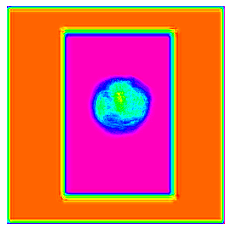

In [20]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_path = 'sarcopenia-ai-master/Deblurred_Outputs/deblur17.jpg'
img = image.load_img(img_path, target_size=(256,256))
pred = image.img_to_array(img)
pred = np.expand_dims(pred, axis=0)
pred = pred.astype('float32')/255

prediction = model.predict(pred)

plt.imshow(np.squeeze(prediction), cmap = 'hsv')
plt.savefig("seg4.jpg")
plt.axis('off')

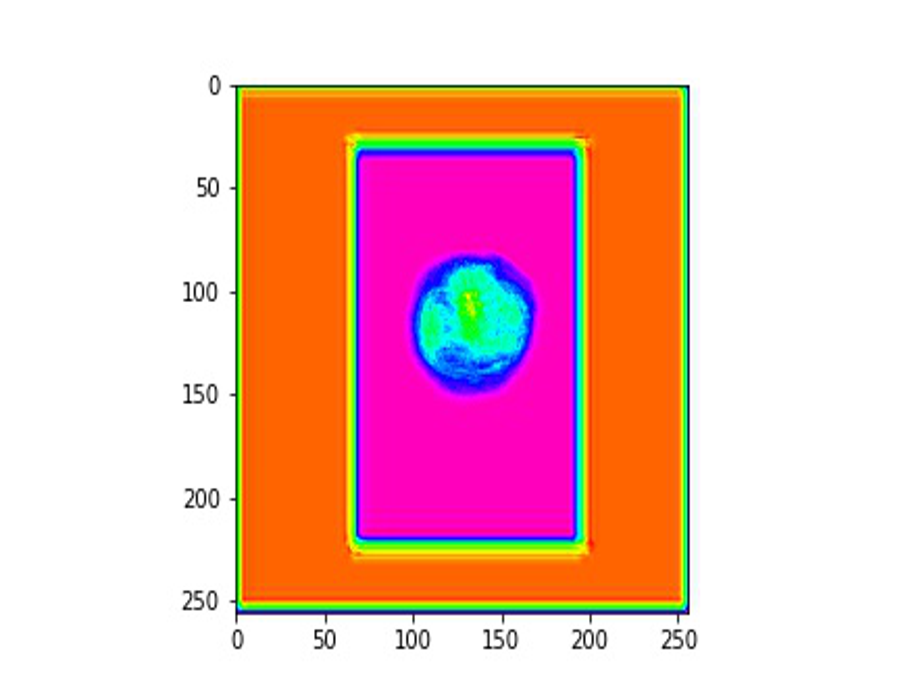

In [21]:
import cv2
from skimage.io import imread, imshow
from PIL import Image
img = Image.open('seg4.jpg')
img.resize((900,700))

In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # impor
# # img_path = 'filter2.jpg'
# # img = cv2.imread(img_path)
# t_img = resize(train_imgs, (256, 256, 1))


# # pred = np.asarray(t_img)
# # pred = np.expand_dims(pred, axis=0)
# # pred = pred.astype('float32')/255

# prediction = model.predict(pred)
# plt.imshow(prediction[0])


In [ ]:
# (cv2_imshow(mask_imgs)

In [ ]:
# from PIL import Image
# from skimage import color
# from skimage import io
# import numpy as np
# im = Image.open('seg1.jpg')


# plt.imshow(im)